<a href="https://colab.research.google.com/github/agusputrawan/Clustering_Classification_Project/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Putu_Agus_Putrawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.stats import zscore

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/agusputrawan/Clustering_Classification_Project/refs/heads/main/Dataset/Credit_Card_Dataset.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 8950
Number of columns: 18


In [8]:
# Dictionary untuk mengganti nama kolom
columns_translation = {
    "CUST_ID": "ID_PELANGGAN",
    "BALANCE": "SALDO",
    "BALANCE_FREQUENCY": "FREKUENSI_SALDO",
    "PURCHASES": "TOTAL_PEMBELIAN",
    "ONEOFF_PURCHASES": "PEMBELIAN_TUNGGAL",
    "INSTALLMENTS_PURCHASES": "PEMBELIAN_CICILAN",
    "CASH_ADVANCE": "PENARIKAN_TUNAI",
    "PURCHASES_FREQUENCY": "FREKUENSI_PEMBELIAN",
    "ONEOFF_PURCHASES_FREQUENCY": "FREKUENSI_PEMBELIAN_TUNGGAL",
    "PURCHASES_INSTALLMENTS_FREQUENCY": "FREKUENSI_PEMBELIAN_CICILAN",
    "CASH_ADVANCE_FREQUENCY": "FREKUENSI_PENARIKAN_TUNAI",
    "CASH_ADVANCE_TRX": "TRANSAKSI_PENARIKAN_TUNAI",
    "PURCHASES_TRX": "TRANSAKSI_PEMBELIAN",
    "CREDIT_LIMIT": "BATAS_KREDIT",
    "PAYMENTS": "PEMBAYARAN",
    "MINIMUM_PAYMENTS": "PEMBAYARAN_MINIMUM",
    "PRC_FULL_PAYMENT": "PERSEN_PEMBAYARAN_LUNAS",
    "TENURE": "MASA_LAYANAN"
}

# Mengubah nama kolom pada DataFrame
df = df.rename(columns=columns_translation)

# Menampilkan DataFrame dengan nama kolom baru
print(df.head())


  ID_PELANGGAN        SALDO  FREKUENSI_SALDO  TOTAL_PEMBELIAN  \
0       C10001    40.900749         0.818182            95.40   
1       C10002  3202.467416         0.909091             0.00   
2       C10003  2495.148862         1.000000           773.17   
3       C10004  1666.670542         0.636364          1499.00   
4       C10005   817.714335         1.000000            16.00   

   PEMBELIAN_TUNGGAL  PEMBELIAN_CICILAN  PENARIKAN_TUNAI  FREKUENSI_PEMBELIAN  \
0               0.00               95.4         0.000000             0.166667   
1               0.00                0.0      6442.945483             0.000000   
2             773.17                0.0         0.000000             1.000000   
3            1499.00                0.0       205.788017             0.083333   
4              16.00                0.0         0.000000             0.083333   

   FREKUENSI_PEMBELIAN_TUNGGAL  FREKUENSI_PEMBELIAN_CICILAN  \
0                     0.000000                     0.083333

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID_PELANGGAN                 8950 non-null   object 
 1   SALDO                        8950 non-null   float64
 2   FREKUENSI_SALDO              8950 non-null   float64
 3   TOTAL_PEMBELIAN              8950 non-null   float64
 4   PEMBELIAN_TUNGGAL            8950 non-null   float64
 5   PEMBELIAN_CICILAN            8950 non-null   float64
 6   PENARIKAN_TUNAI              8950 non-null   float64
 7   FREKUENSI_PEMBELIAN          8950 non-null   float64
 8   FREKUENSI_PEMBELIAN_TUNGGAL  8950 non-null   float64
 9   FREKUENSI_PEMBELIAN_CICILAN  8950 non-null   float64
 10  FREKUENSI_PENARIKAN_TUNAI    8950 non-null   float64
 11  TRANSAKSI_PENARIKAN_TUNAI    8950 non-null   int64  
 12  TRANSAKSI_PEMBELIAN          8950 non-null   int64  
 13  BATAS_KREDIT      

In [11]:
df.describe()

,SALDO,FREKUENSI_SALDO,TOTAL_PEMBELIAN,PEMBELIAN_TUNGGAL,PEMBELIAN_CICILAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_TUNGGAL,FREKUENSI_PEMBELIAN_CICILAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMUM,PERSEN_PEMBAYARAN_LUNAS,MASA_LAYANAN
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [14]:
duplicatesN = df[df.duplicated()]['ID_PELANGGAN'].count()
print(f"Number of dupplicated entries: {duplicatesN}")

Number of dupplicated entries: 0


In [15]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage
PEMBAYARAN_MINIMUM,313,3.497207
BATAS_KREDIT,1,0.011173


In [16]:
df = df.dropna().reset_index(drop=True)
df

,ID_PELANGGAN,SALDO,FREKUENSI_SALDO,TOTAL_PEMBELIAN,PEMBELIAN_TUNGGAL,PEMBELIAN_CICILAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_TUNGGAL,FREKUENSI_PEMBELIAN_CICILAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMUM,PERSEN_PEMBAYARAN_LUNAS,MASA_LAYANAN
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8632,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8633,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8634,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [18]:
df.columns

Index(['ID_PELANGGAN', 'SALDO', 'FREKUENSI_SALDO', 'TOTAL_PEMBELIAN',
       'PEMBELIAN_TUNGGAL', 'PEMBELIAN_CICILAN', 'PENARIKAN_TUNAI',
       'FREKUENSI_PEMBELIAN', 'FREKUENSI_PEMBELIAN_TUNGGAL',
       'FREKUENSI_PEMBELIAN_CICILAN', 'FREKUENSI_PENARIKAN_TUNAI',
       'TRANSAKSI_PENARIKAN_TUNAI', 'TRANSAKSI_PEMBELIAN', 'BATAS_KREDIT',
       'PEMBAYARAN', 'PEMBAYARAN_MINIMUM', 'PERSEN_PEMBAYARAN_LUNAS',
       'MASA_LAYANAN'],
      dtype='object')

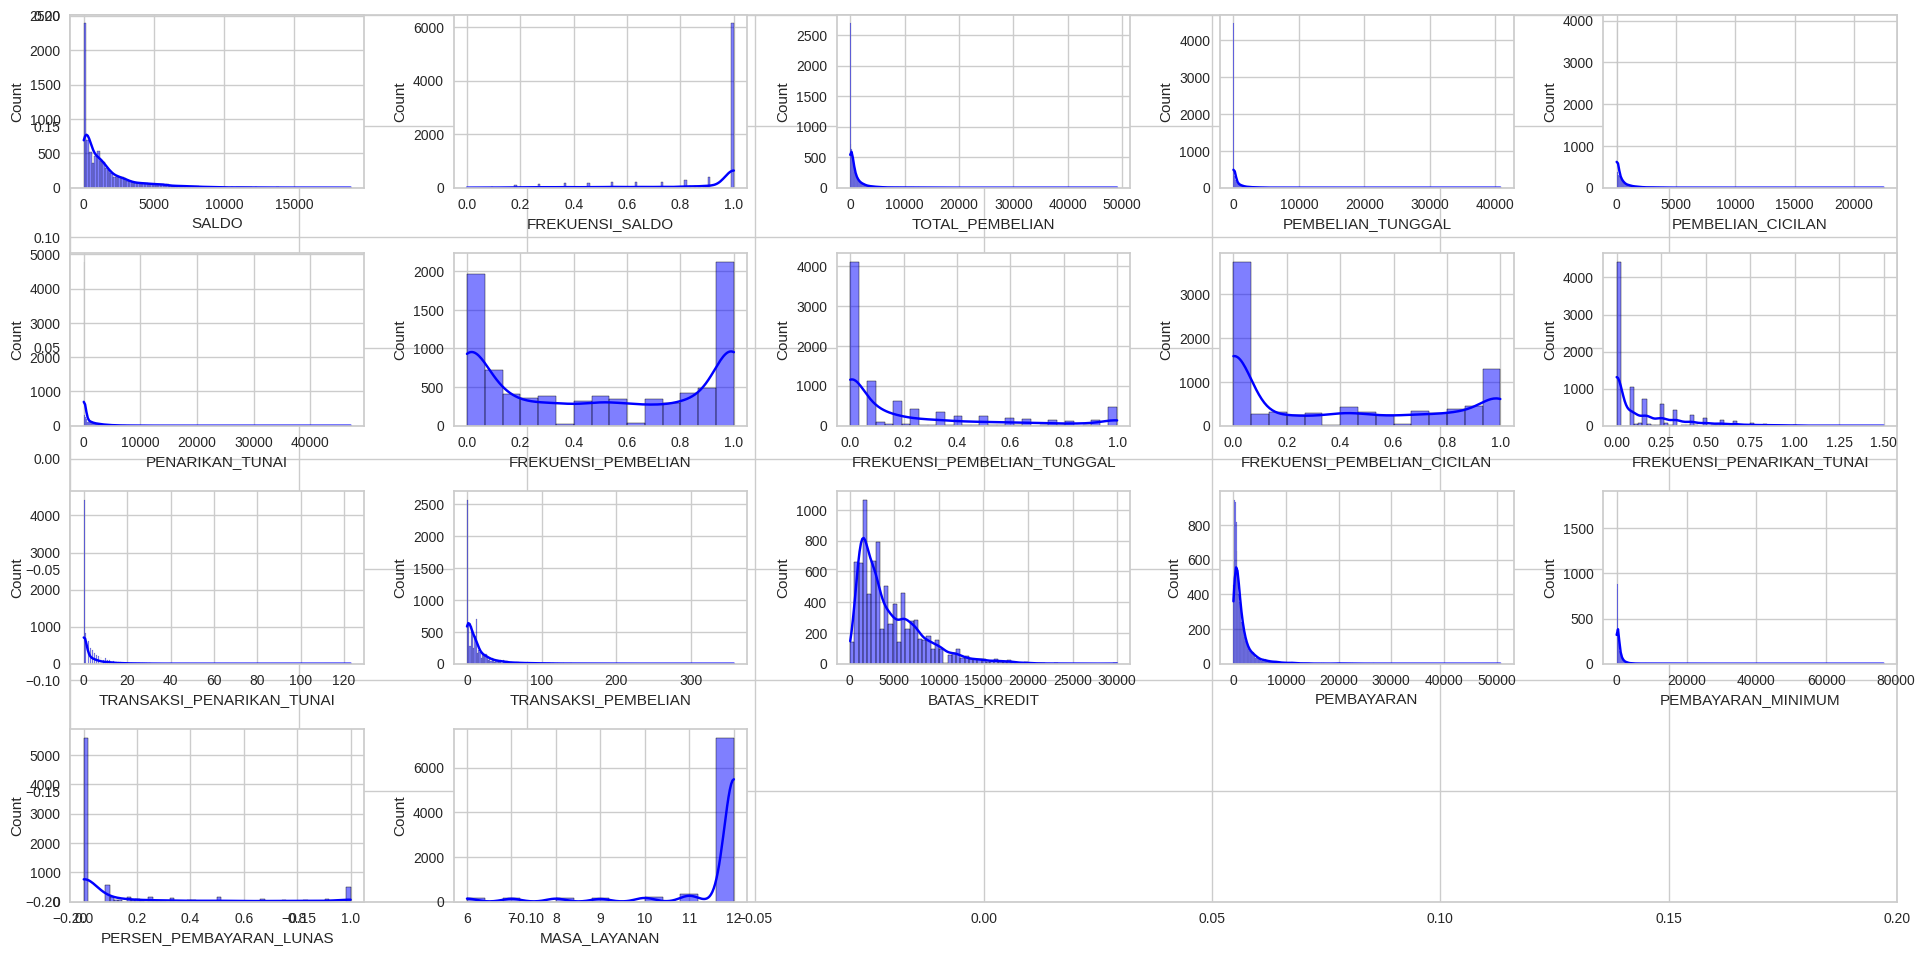

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.margins(1.5)
num = df.select_dtypes(include=['int64', 'float64']).columns

for i in range(0, len(num)):
    plt.subplot(4, 5, i + 1)
    sns.histplot(df[num[i]], kde=True, color='blue')
    plt.tight_layout()

plt.show()

In [23]:
df['MASA_LAYANAN'].value_counts()

,count
MASA_LAYANAN,
12,7346
11,356
10,226
6,184
8,183
7,177
9,164


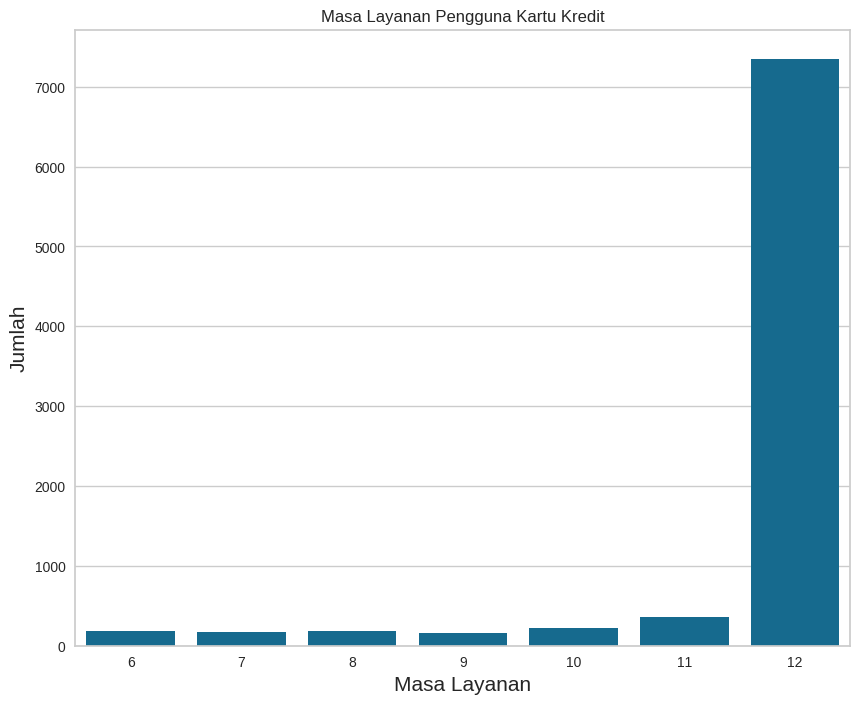

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='MASA_LAYANAN')
plt.title('Masa Layanan Pengguna Kartu Kredit')
plt.xlabel('Masa Layanan',fontsize=15)
plt.ylabel('Jumlah',fontsize=15)
plt.show()

In [27]:
df.columns

Index(['ID_PELANGGAN', 'SALDO', 'FREKUENSI_SALDO', 'TOTAL_PEMBELIAN',
       'PEMBELIAN_TUNGGAL', 'PEMBELIAN_CICILAN', 'PENARIKAN_TUNAI',
       'FREKUENSI_PEMBELIAN', 'FREKUENSI_PEMBELIAN_TUNGGAL',
       'FREKUENSI_PEMBELIAN_CICILAN', 'FREKUENSI_PENARIKAN_TUNAI',
       'TRANSAKSI_PENARIKAN_TUNAI', 'TRANSAKSI_PEMBELIAN', 'BATAS_KREDIT',
       'PEMBAYARAN', 'PEMBAYARAN_MINIMUM', 'PERSEN_PEMBAYARAN_LUNAS',
       'MASA_LAYANAN'],
      dtype='object')

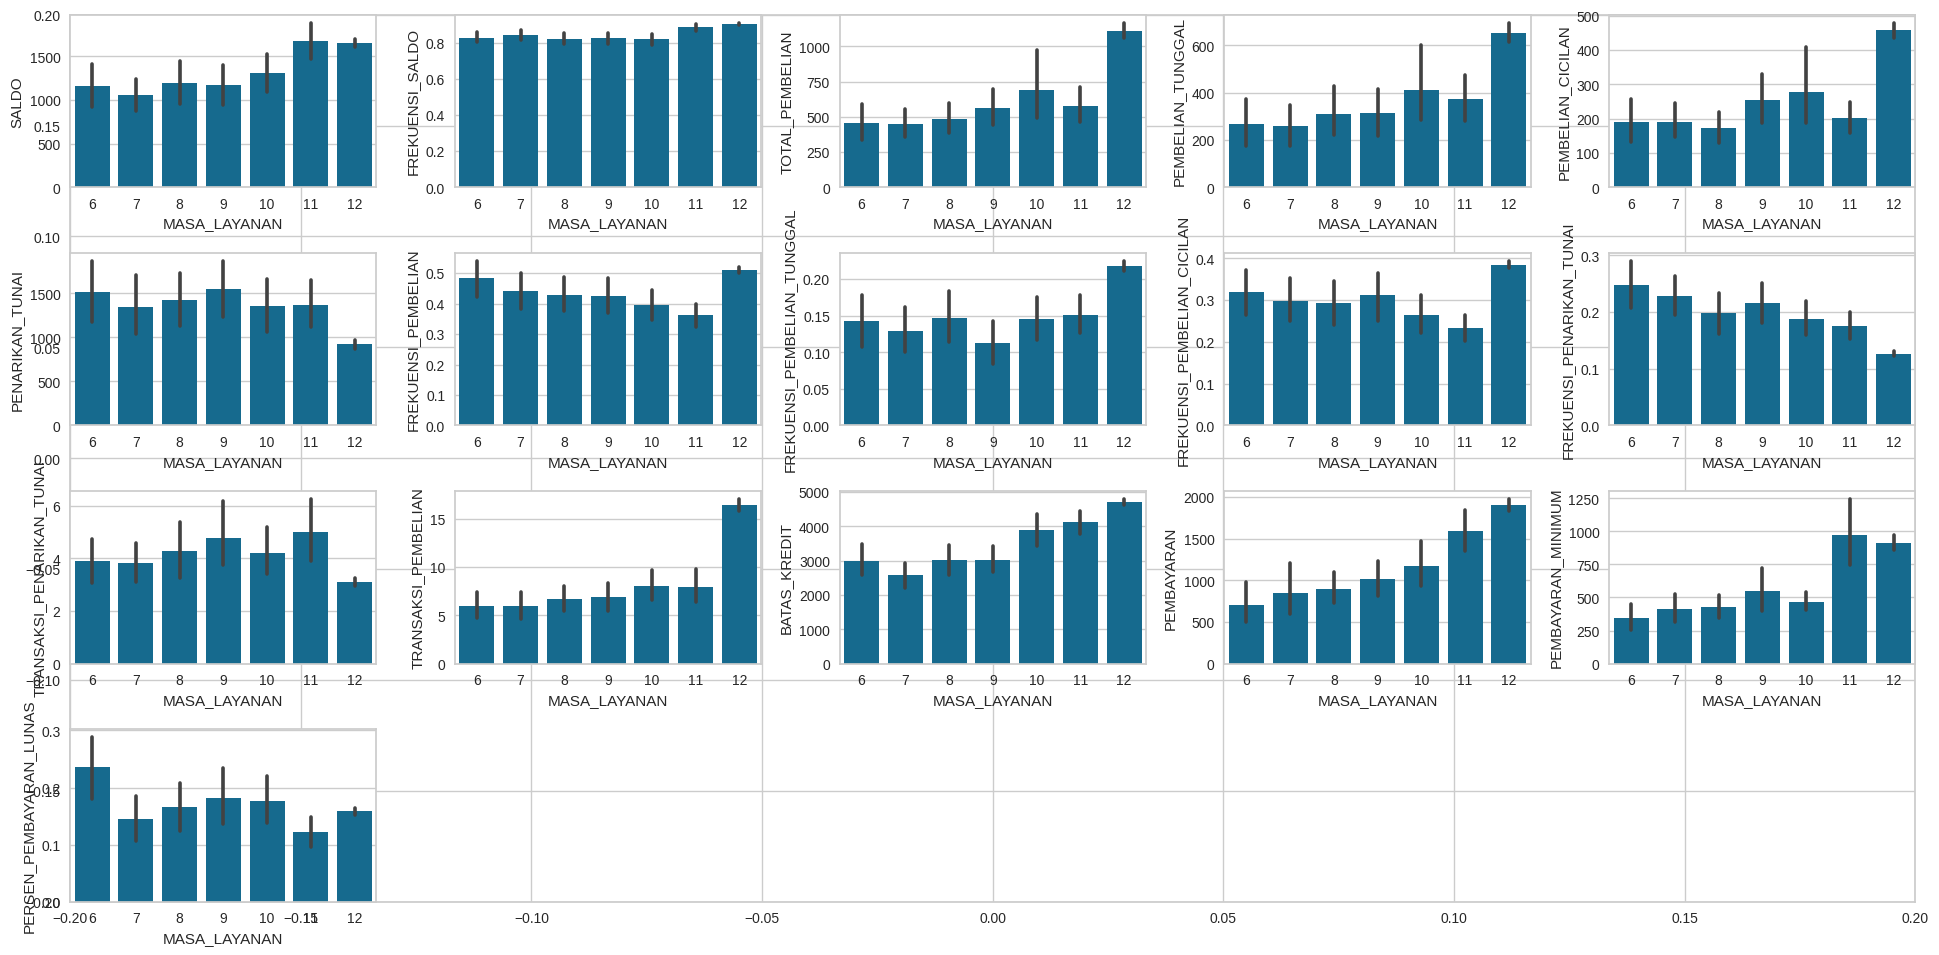

In [29]:
col = ['SALDO', 'FREKUENSI_SALDO', 'TOTAL_PEMBELIAN',
       'PEMBELIAN_TUNGGAL', 'PEMBELIAN_CICILAN', 'PENARIKAN_TUNAI',
       'FREKUENSI_PEMBELIAN', 'FREKUENSI_PEMBELIAN_TUNGGAL',
       'FREKUENSI_PEMBELIAN_CICILAN', 'FREKUENSI_PENARIKAN_TUNAI',
       'TRANSAKSI_PENARIKAN_TUNAI', 'TRANSAKSI_PEMBELIAN', 'BATAS_KREDIT',
       'PEMBAYARAN', 'PEMBAYARAN_MINIMUM', 'PERSEN_PEMBAYARAN_LUNAS']

fig, ax = plt.subplots(figsize=(20,10))
plt.margins(1.5)

for i in range(0, len(col)):
    plt.subplot(4,5, i+1)
    sns.barplot(data=df,x=df['MASA_LAYANAN'],y=df[col[i]])
    plt.tight_layout()
plt.show()

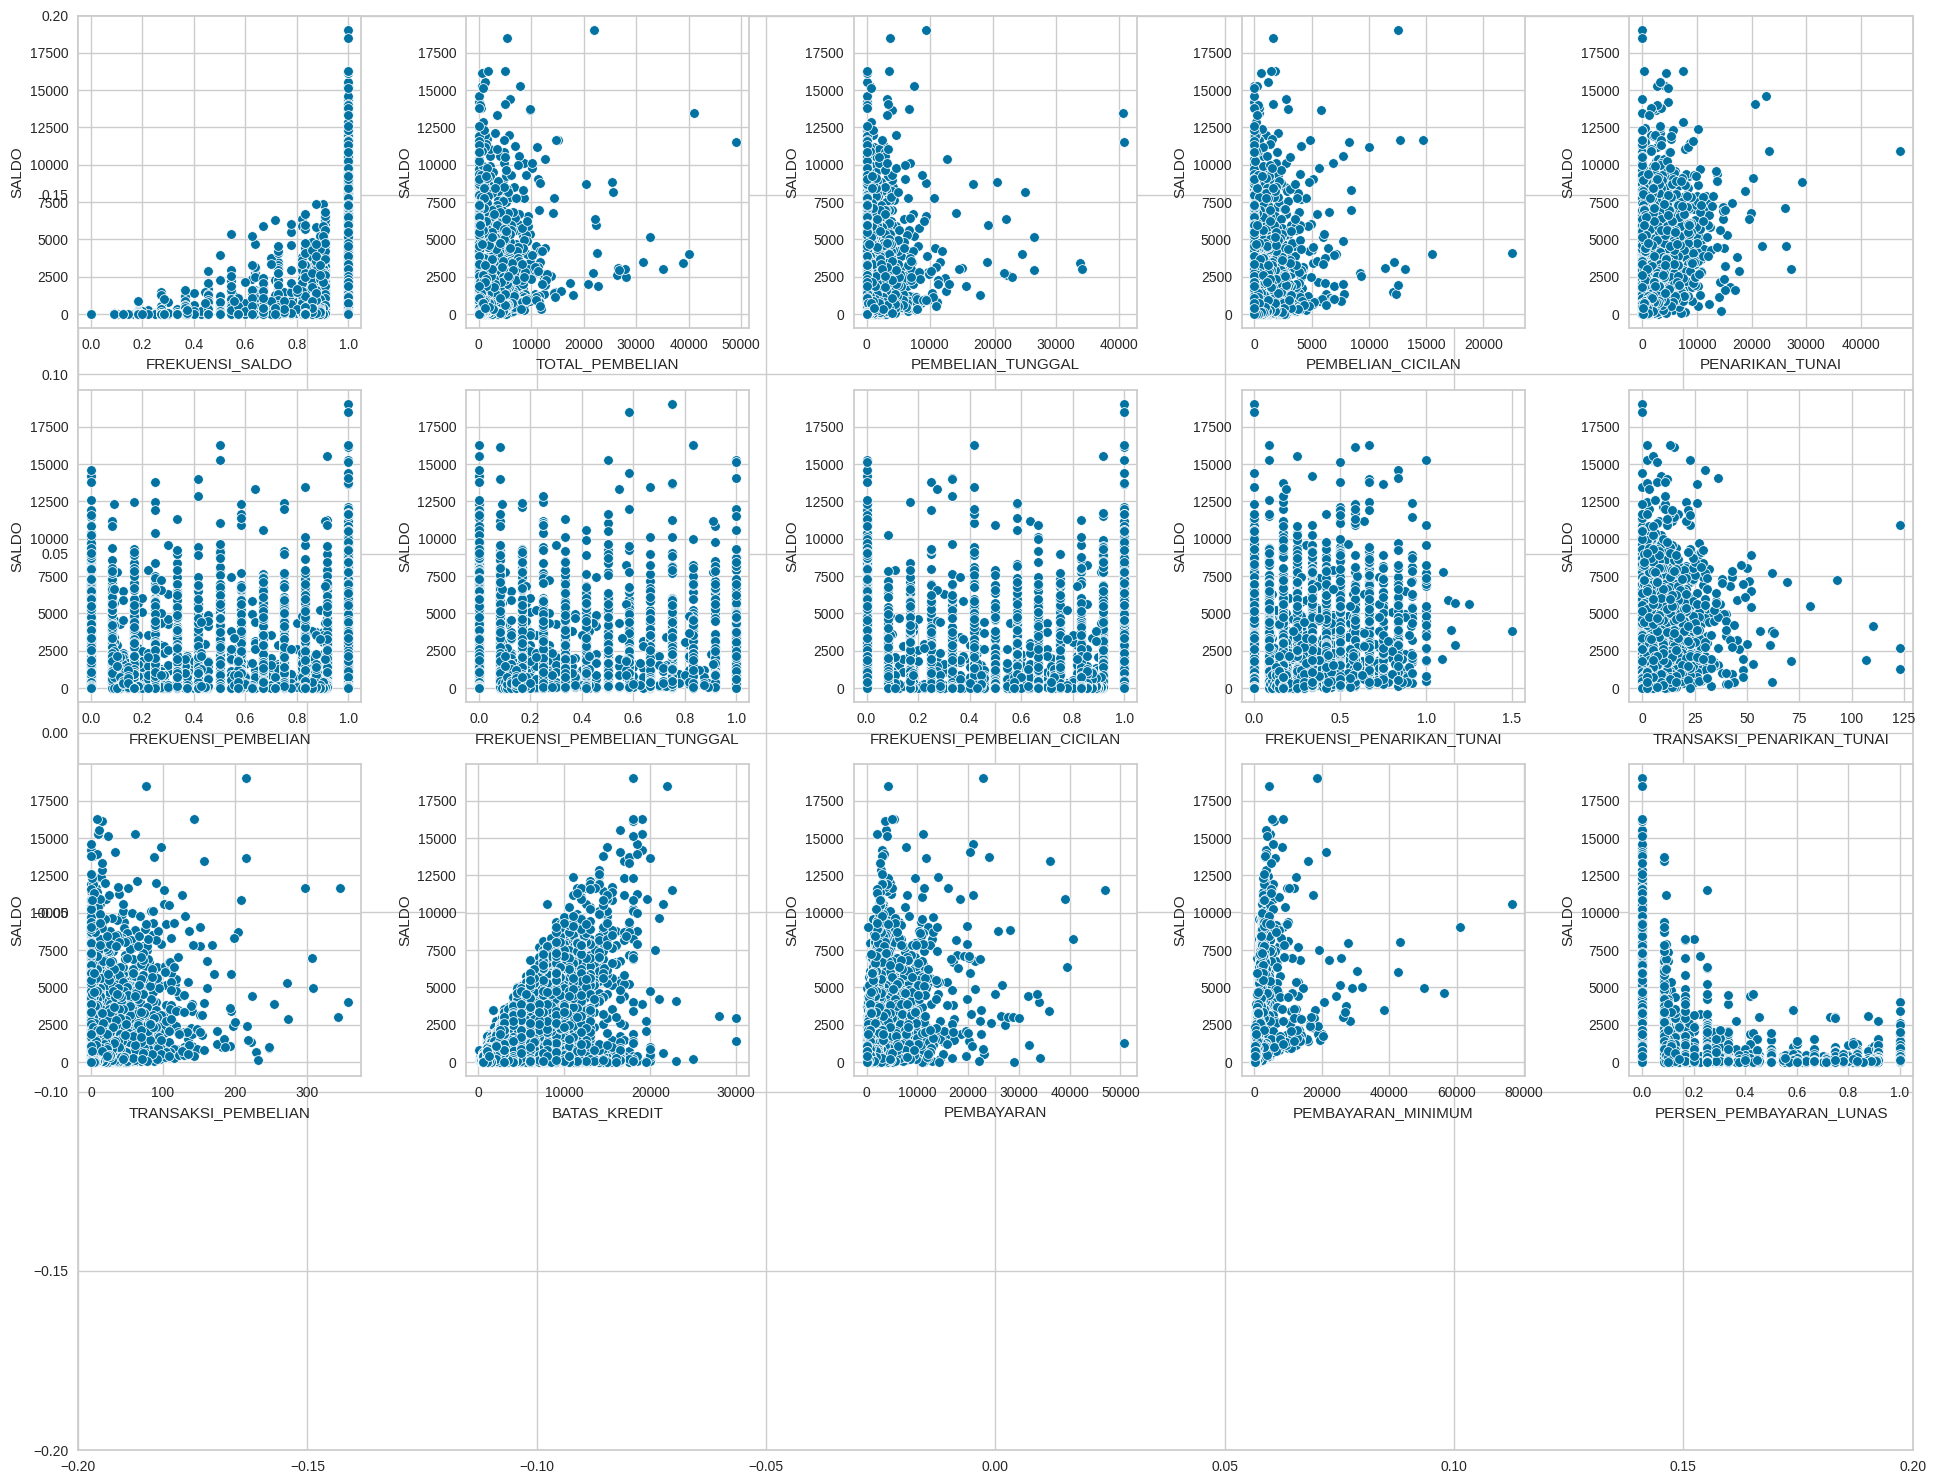

In [30]:
scatter_colomn = ['FREKUENSI_SALDO', 'TOTAL_PEMBELIAN',
       'PEMBELIAN_TUNGGAL', 'PEMBELIAN_CICILAN', 'PENARIKAN_TUNAI',
       'FREKUENSI_PEMBELIAN', 'FREKUENSI_PEMBELIAN_TUNGGAL',
       'FREKUENSI_PEMBELIAN_CICILAN', 'FREKUENSI_PENARIKAN_TUNAI',
       'TRANSAKSI_PENARIKAN_TUNAI', 'TRANSAKSI_PEMBELIAN', 'BATAS_KREDIT',
       'PEMBAYARAN', 'PEMBAYARAN_MINIMUM', 'PERSEN_PEMBAYARAN_LUNAS']
fig, ax = plt.subplots(figsize=(20,15))
plt.margins(1.5)
for i in range(0, len(scatter_colomn)):
    plt.subplot(4,5, i+1)
    sns.scatterplot(x=df[scatter_colomn[i]], y=df['SALDO'])
    plt.tight_layout()
plt.show()

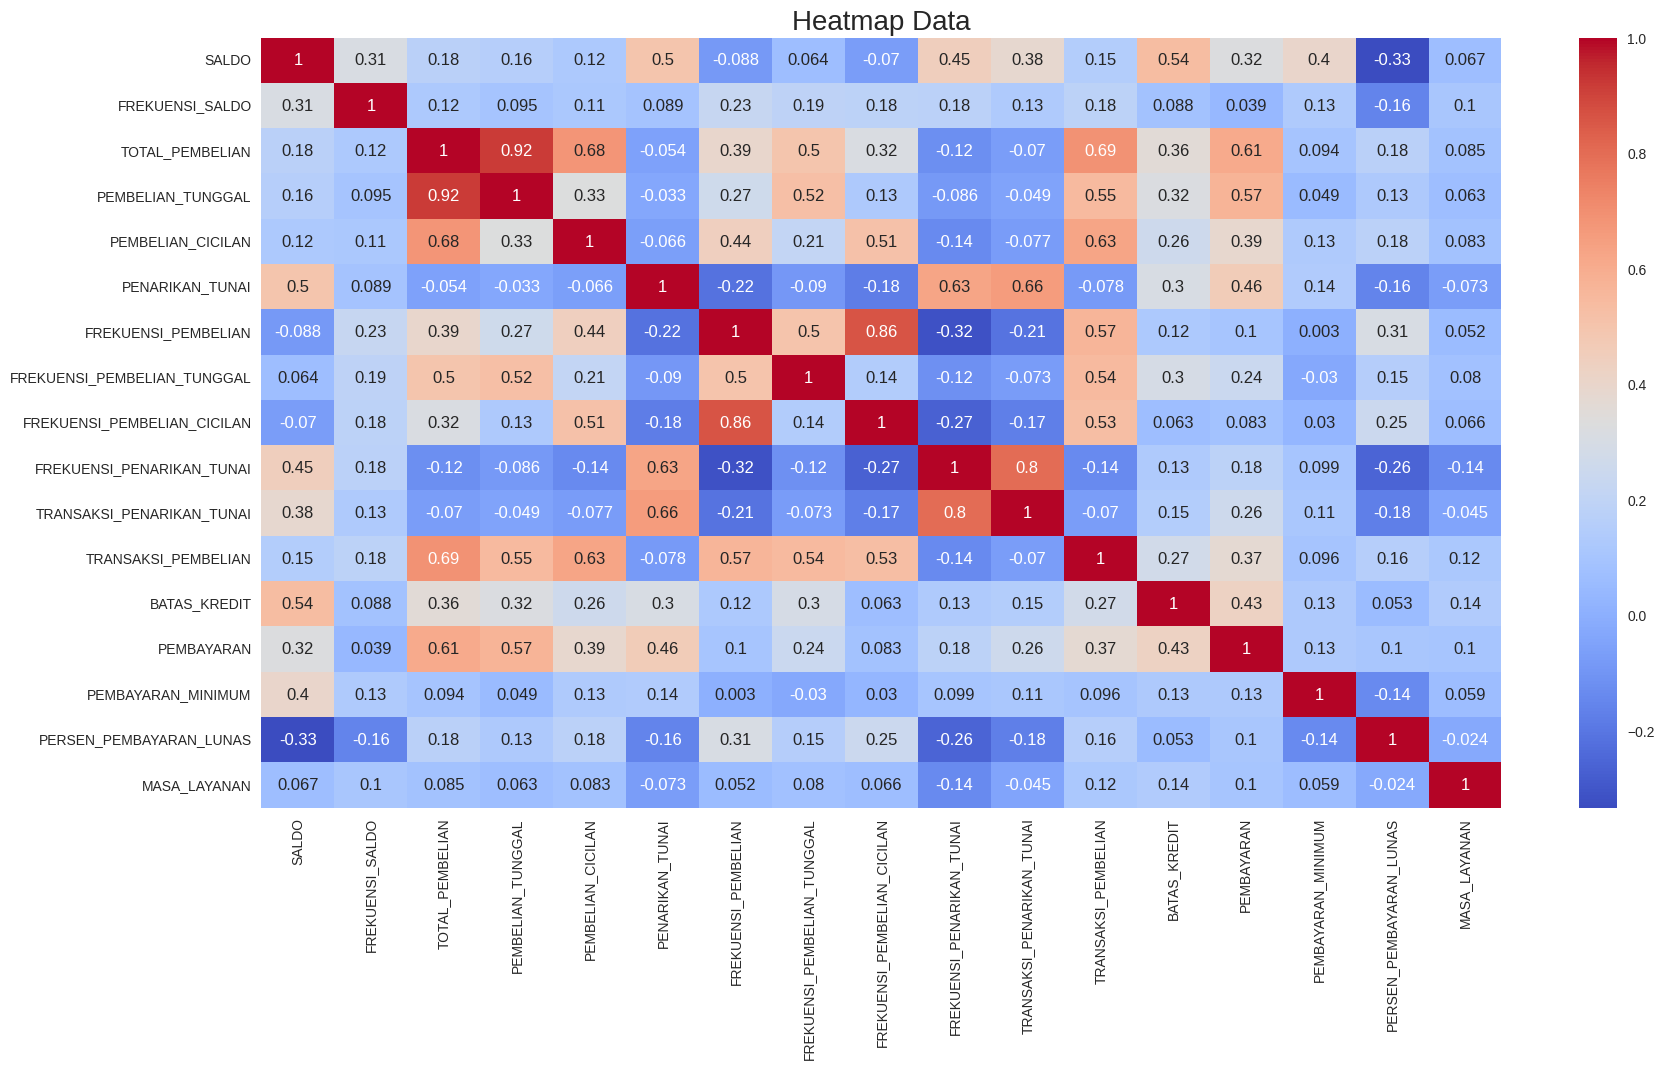

In [32]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(20, 10))
sns.heatmap(numerical_df.corr(), cmap='coolwarm', annot=True, fmt=".2g")
plt.title('Heatmap Data', fontsize=20)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [33]:
cluster = df.copy()
cluster

,ID_PELANGGAN,SALDO,FREKUENSI_SALDO,TOTAL_PEMBELIAN,PEMBELIAN_TUNGGAL,PEMBELIAN_CICILAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_TUNGGAL,FREKUENSI_PEMBELIAN_CICILAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMUM,PERSEN_PEMBAYARAN_LUNAS,MASA_LAYANAN
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8632,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8633,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8634,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [34]:
cluster.columns

Index(['ID_PELANGGAN', 'SALDO', 'FREKUENSI_SALDO', 'TOTAL_PEMBELIAN',
       'PEMBELIAN_TUNGGAL', 'PEMBELIAN_CICILAN', 'PENARIKAN_TUNAI',
       'FREKUENSI_PEMBELIAN', 'FREKUENSI_PEMBELIAN_TUNGGAL',
       'FREKUENSI_PEMBELIAN_CICILAN', 'FREKUENSI_PENARIKAN_TUNAI',
       'TRANSAKSI_PENARIKAN_TUNAI', 'TRANSAKSI_PEMBELIAN', 'BATAS_KREDIT',
       'PEMBAYARAN', 'PEMBAYARAN_MINIMUM', 'PERSEN_PEMBAYARAN_LUNAS',
       'MASA_LAYANAN'],
      dtype='object')

In [42]:
scaler = StandardScaler()
cluster[['SALDO','TOTAL_PEMBELIAN', 'PEMBELIAN_TUNGGAL',
       'PEMBELIAN_CICILAN', 'PENARIKAN_TUNAI','TRANSAKSI_PENARIKAN_TUNAI',
       'TRANSAKSI_PEMBELIAN', 'BATAS_KREDIT', 'PEMBAYARAN',
       'PEMBAYARAN_MINIMUM']] = scaler.fit_transform(cluster[['SALDO','TOTAL_PEMBELIAN', 'PEMBELIAN_TUNGGAL',
       'PEMBELIAN_CICILAN', 'PENARIKAN_TUNAI','TRANSAKSI_PENARIKAN_TUNAI',
       'TRANSAKSI_PEMBELIAN', 'BATAS_KREDIT', 'PEMBAYARAN',
       'PEMBAYARAN_MINIMUM']])
cluster.head()

,ID_PELANGGAN,SALDO,FREKUENSI_SALDO,TOTAL_PEMBELIAN,PEMBELIAN_TUNGGAL,PEMBELIAN_CICILAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_TUNGGAL,FREKUENSI_PEMBELIAN_CICILAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMUM,PERSEN_PEMBAYARAN_LUNAS,MASA_LAYANAN
0,C10001,-0.744625,0.818182,-0.429184,-0.359160,-0.354826,-0.468655,0.166667,0.000000,0.083333,0.00,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,0.000000,12
1,C10002,0.764152,0.909091,-0.473208,-0.359160,-0.458839,2.568556,0.000000,0.000000,0.000000,0.25,0.099258,-0.597054,0.677204,0.796852,0.087689,0.222222,12
2,C10003,0.426602,1.000000,-0.116413,0.099909,-0.458839,-0.468655,1.000000,1.000000,0.000000,0.00,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,0.000000,12
3,C10005,-0.373910,1.000000,-0.465825,-0.349660,-0.458839,-0.468655,0.083333,0.083333,0.000000,0.00,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,0.000000,12
4,C10006,0.099551,1.000000,0.142062,-0.359160,0.994815,-0.468655,0.666667,0.000000,0.583333,0.00,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,0.000000,12


In [44]:
cluster.drop(['ID_PELANGGAN', 'MASA_LAYANAN'],axis=1,inplace=True)
cluster.head()


,SALDO,FREKUENSI_SALDO,TOTAL_PEMBELIAN,PEMBELIAN_TUNGGAL,PEMBELIAN_CICILAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_TUNGGAL,FREKUENSI_PEMBELIAN_CICILAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMUM,PERSEN_PEMBAYARAN_LUNAS
0,-0.744625,0.818182,-0.429184,-0.359160,-0.354826,-0.468655,0.166667,0.000000,0.083333,0.00,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,0.000000
1,0.764152,0.909091,-0.473208,-0.359160,-0.458839,2.568556,0.000000,0.000000,0.000000,0.25,0.099258,-0.597054,0.677204,0.796852,0.087689,0.222222
2,0.426602,1.000000,-0.116413,0.099909,-0.458839,-0.468655,1.000000,1.000000,0.000000,0.00,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,0.000000
3,-0.373910,1.000000,-0.465825,-0.349660,-0.458839,-0.468655,0.083333,0.083333,0.000000,0.00,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,0.000000
4,0.099551,1.000000,0.142062,-0.359160,0.994815,-0.468655,0.666667,0.000000,0.583333,0.00,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,0.000000


In [45]:
pca = PCA(n_components=2)
pca.fit(cluster)
pca_transform = pca.transform(cluster)
pca_transform

array([[-1.55267012, -0.69955162],
       [ 0.23016525,  2.51479069],
       [-0.06034134, -0.15656224],
       ...,
       [-1.40516987, -0.90180723],
       [-1.69684634, -0.51875087],
       [-0.65411491, -0.89522808]])

In [46]:
cluster_pca = pd.DataFrame(data=pca_transform,columns=['pca1','pca2'])
cluster_pca

,pca1,pca2
0,-1.552670,-0.699552
1,0.230165,2.514791
2,-0.060341,-0.156562
3,-1.442769,-0.452346
4,-0.099292,-0.633872
...,...,...
8631,-1.685100,-0.716815
8632,-1.240143,-0.995396
8633,-1.405170,-0.901807
8634,-1.696846,-0.518751


In [47]:
print('explained variance:',pca.explained_variance_ratio_)

explained variance: [0.35949864 0.22780813]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [48]:
Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_pca)
    Sum_of_squared_error.append(km.inertia_)

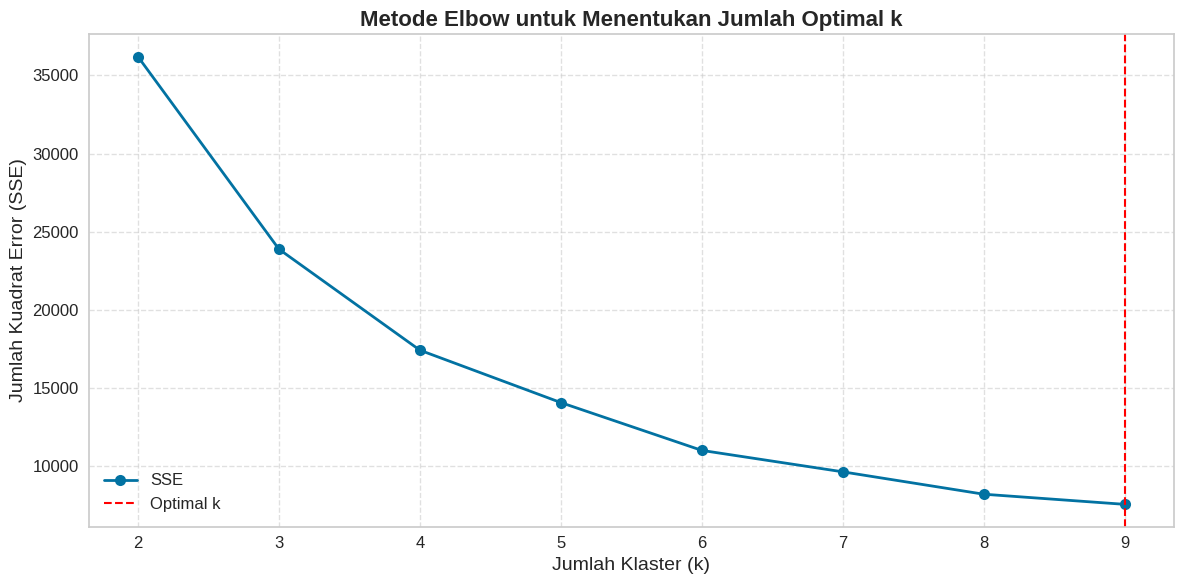

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(K, Sum_of_squared_error, 'bo-', linewidth=2, markersize=8, label='SSE')
plt.xlabel('Jumlah Klaster (k)', fontsize=14)
plt.ylabel('Jumlah Kuadrat Error (SSE)', fontsize=14)
plt.title('Metode Elbow untuk Menentukan Jumlah Optimal k', fontsize=16, weight='bold')
plt.xticks(K, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvline(x=K[np.argmin(Sum_of_squared_error)], color='red', linestyle='--', linewidth=1.5, label='Optimal k')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [53]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_pca)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_pca, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6647309374805703
For n_clusters = 3, silhouette score is 0.5811544359887949
For n_clusters = 4, silhouette score is 0.441727569125809
For n_clusters = 5, silhouette score is 0.48234764098027216
For n_clusters = 6, silhouette score is 0.4228036856426225
For n_clusters = 7, silhouette score is 0.4410751843833679
For n_clusters = 8, silhouette score is 0.4372852991622376
For n_clusters = 9, silhouette score is 0.36616960181621483


In [56]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

df_numeric = df_numeric.dropna()

kmean = KMeans(n_clusters=3, random_state=42)
kmean.fit(df_numeric)

labels = kmean.labels_

print("Labels hasil clustering:", labels)

Labels hasil clustering: [1 0 0 ... 1 1 1]


In [57]:
clusters=pd.concat([df_numeric, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,SALDO,FREKUENSI_SALDO,TOTAL_PEMBELIAN,PEMBELIAN_TUNGGAL,PEMBELIAN_CICILAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_TUNGGAL,FREKUENSI_PEMBELIAN_CICILAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMUM,PERSEN_PEMBAYARAN_LUNAS,MASA_LAYANAN,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

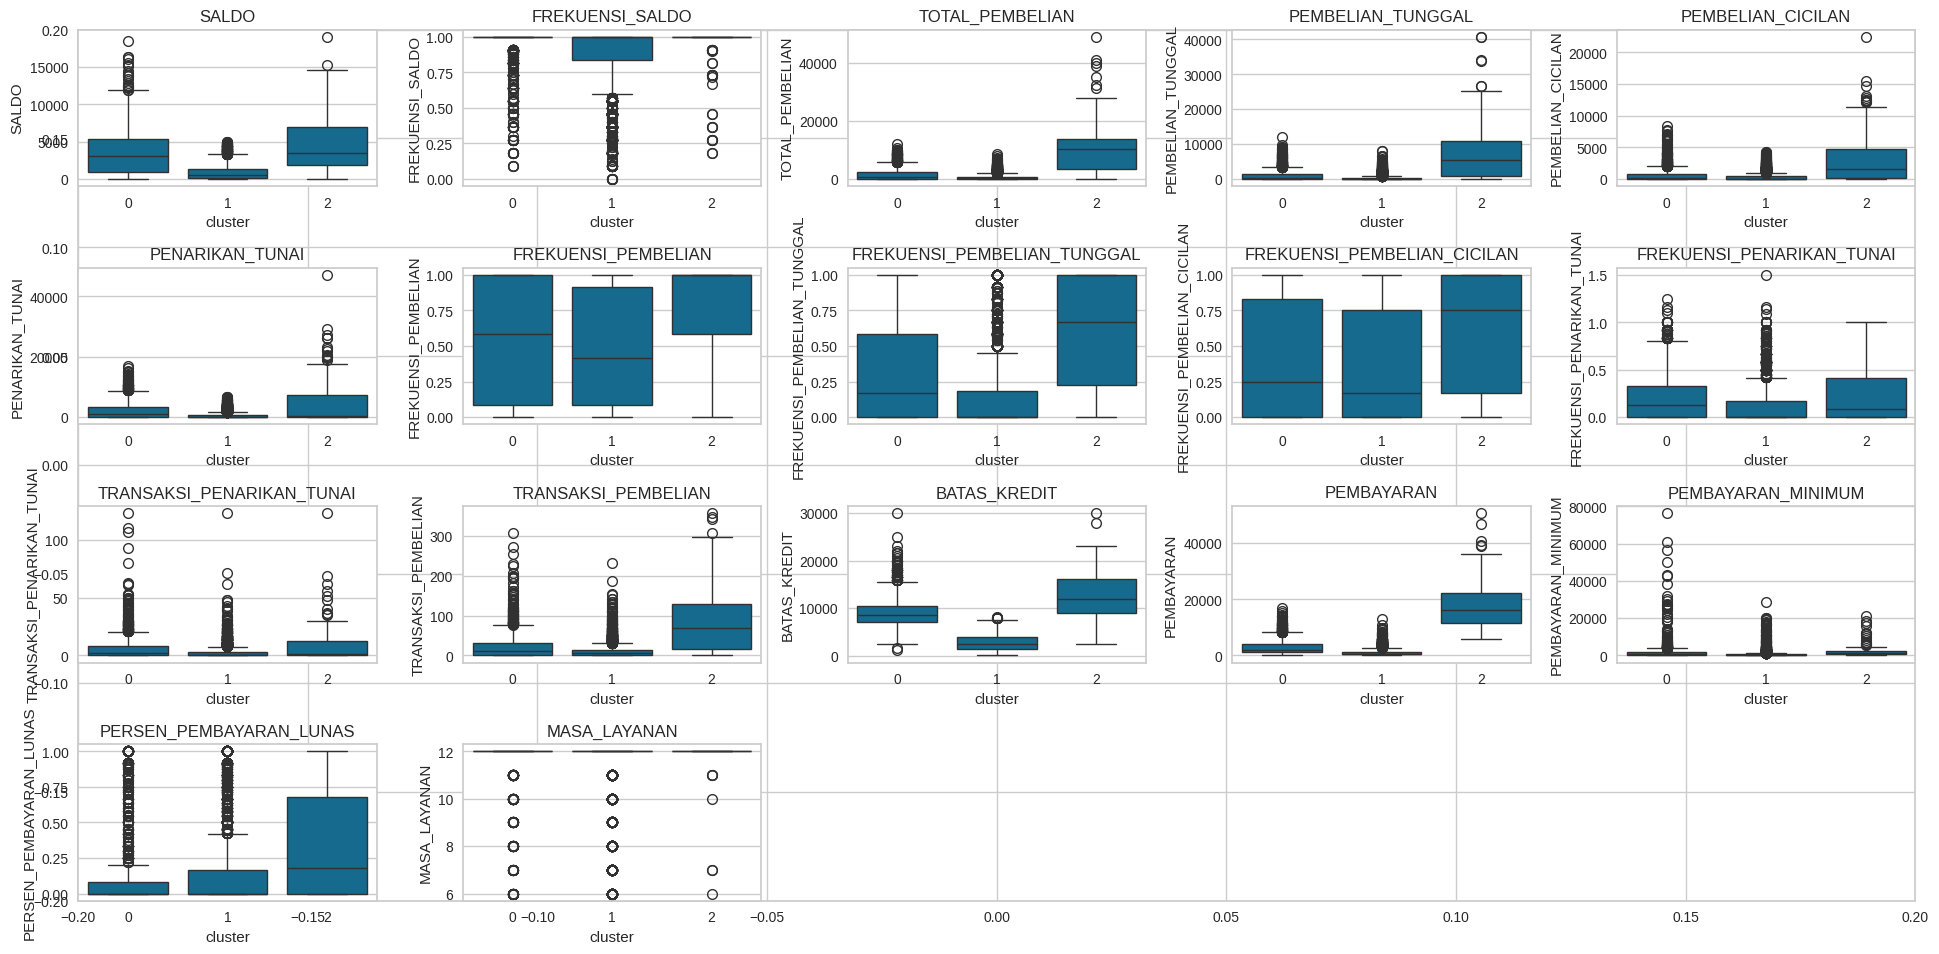

In [58]:
fig, ax = plt.subplots(figsize=(20,10))
plt.margins(1.5)
num = clusters.select_dtypes(include=['int64','float64']).columns
for i in range(0, len(num)):
    plt.subplot(4,5, i+1).set_title(num[i])
    sns.boxplot(data=clusters,x='cluster',y=clusters[num[i]])
    plt.tight_layout()
plt.show()


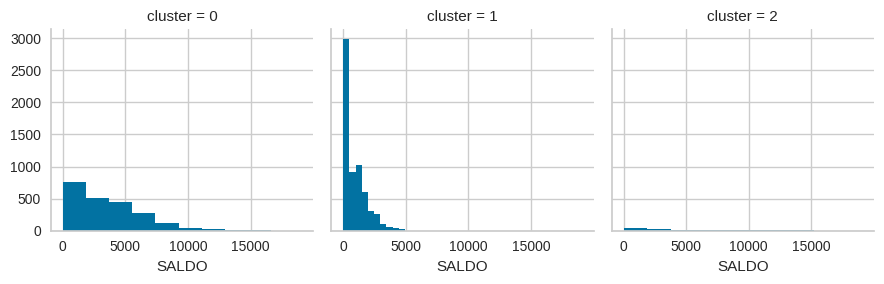

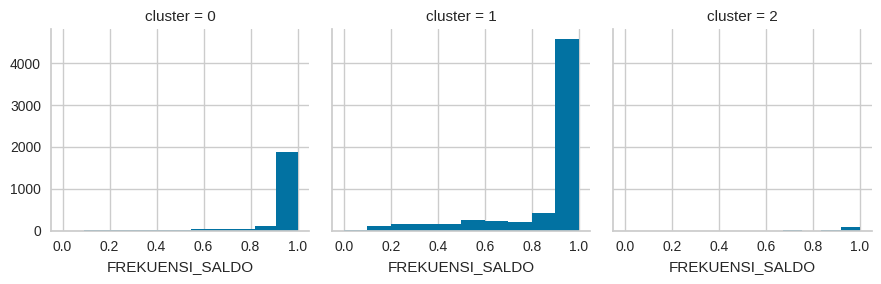

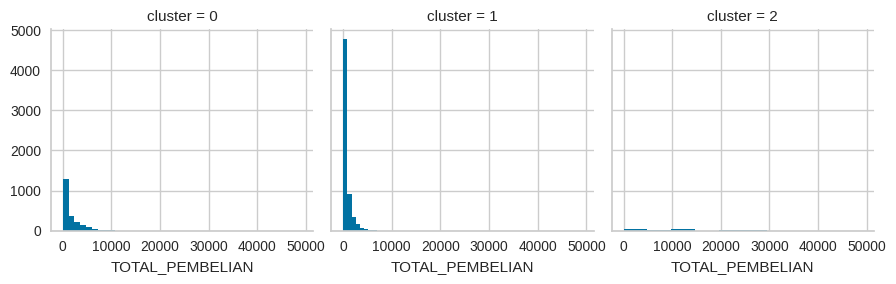

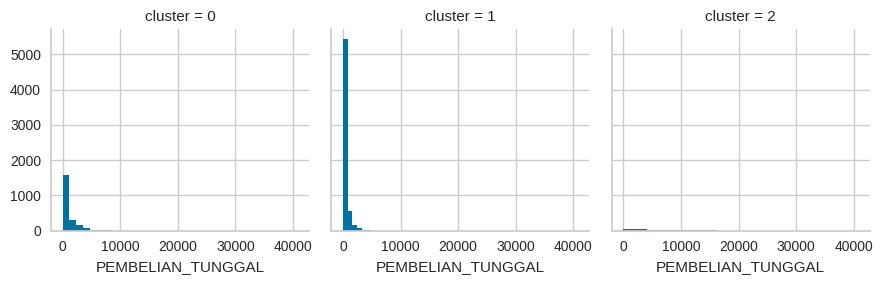

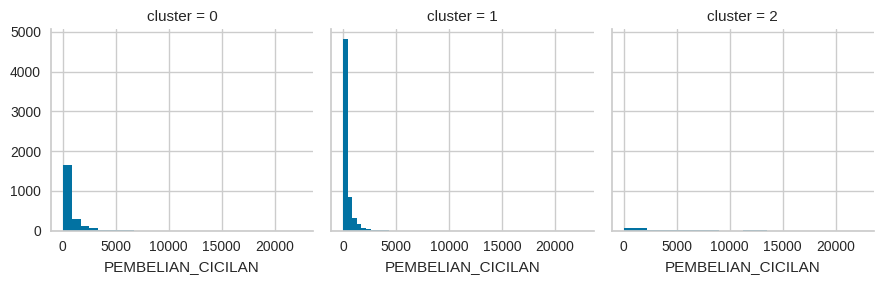

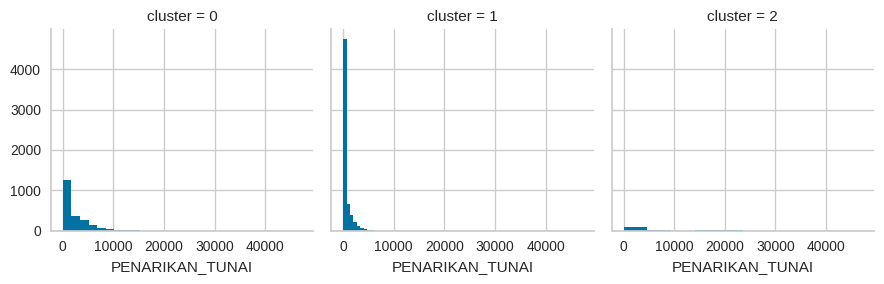

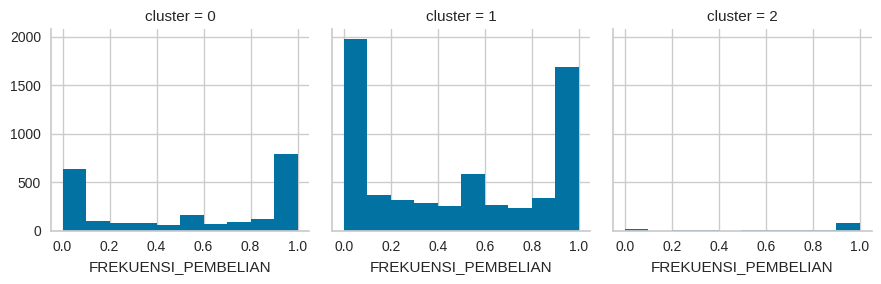

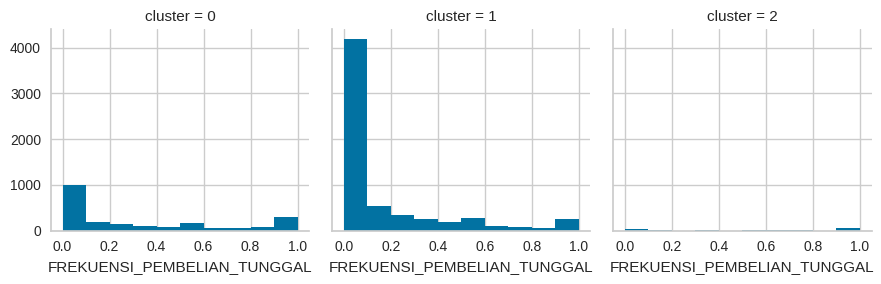

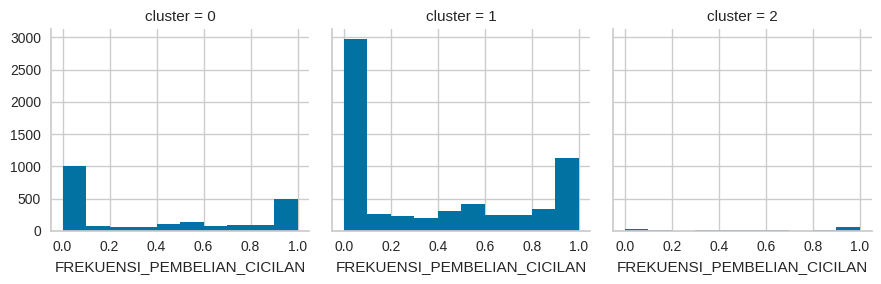

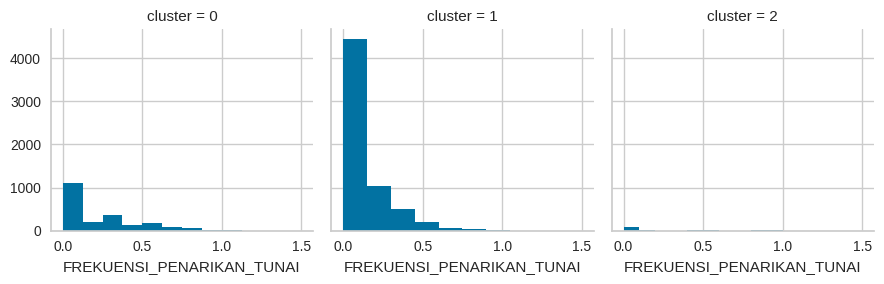

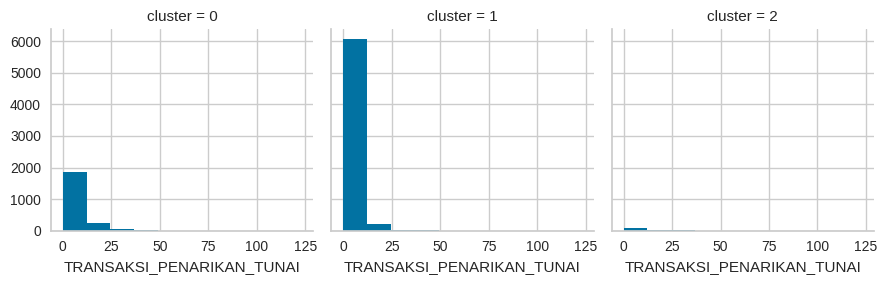

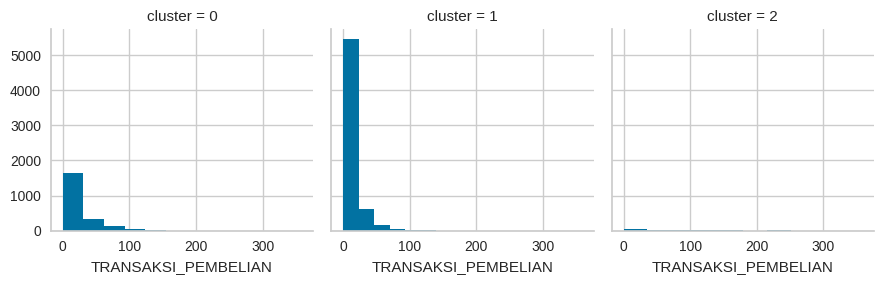

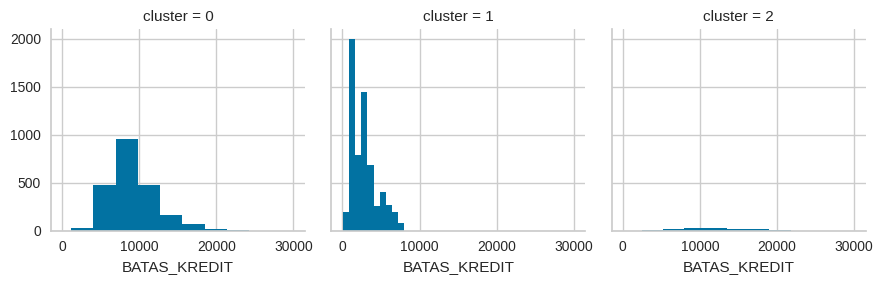

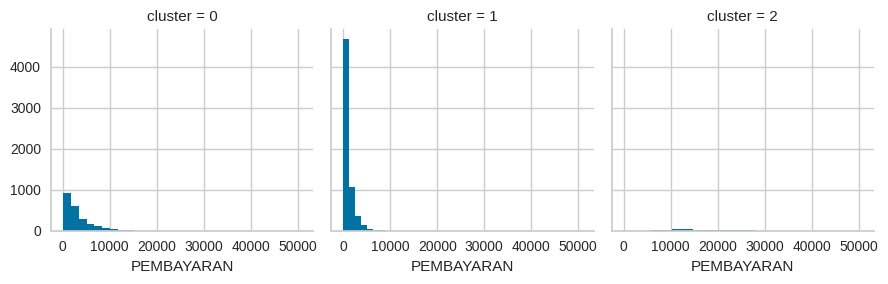

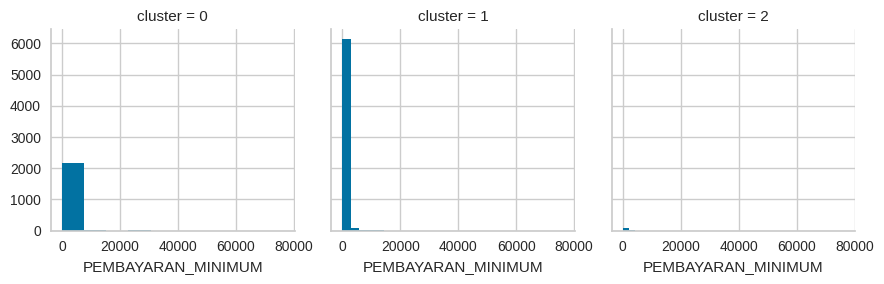

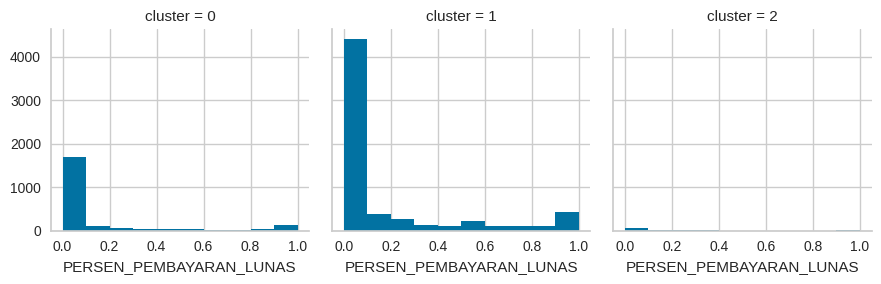

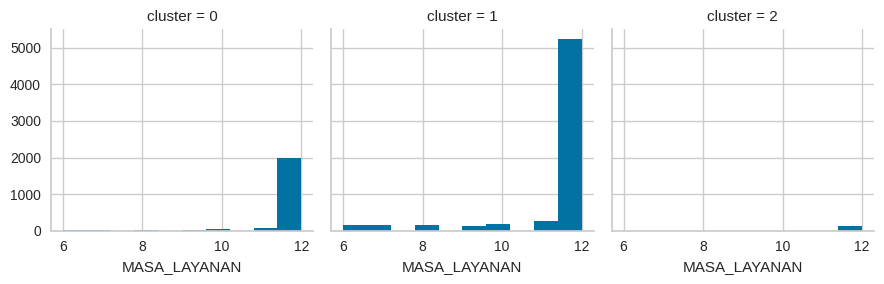

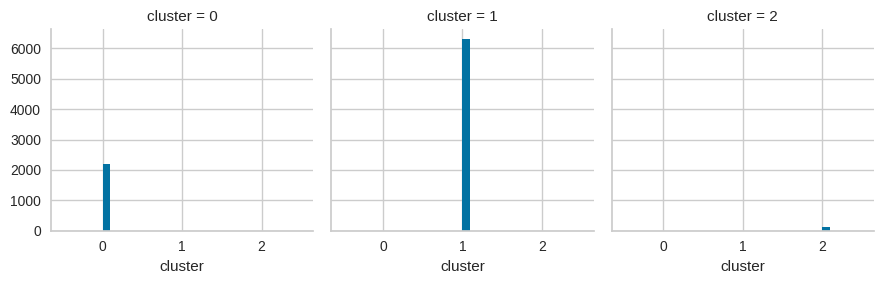

In [59]:
for i in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, i)

In [60]:
clusters.groupby('cluster').mean()

,SALDO,FREKUENSI_SALDO,TOTAL_PEMBELIAN,PEMBELIAN_TUNGGAL,PEMBELIAN_CICILAN,PENARIKAN_TUNAI,FREKUENSI_PEMBELIAN,FREKUENSI_PEMBELIAN_TUNGGAL,FREKUENSI_PEMBELIAN_CICILAN,FREKUENSI_PENARIKAN_TUNAI,TRANSAKSI_PENARIKAN_TUNAI,TRANSAKSI_PEMBELIAN,BATAS_KREDIT,PEMBAYARAN,PEMBAYARAN_MINIMUM,PERSEN_PEMBAYARAN_LUNAS,MASA_LAYANAN
cluster,,,,,,,,,,,,,,,,,
0,3479.485965,0.947071,1600.916852,999.040282,602.202298,2166.971534,0.541184,0.318154,0.387088,0.216111,5.893995,22.280255,9062.581686,2976.058096,1606.902474,0.132953,11.735669
1,881.447559,0.876464,624.425539,323.832407,300.901956,500.910489,0.474914,0.158727,0.357492,0.108474,2.294770,11.039303,2778.870616,1038.719206,572.642601,0.164823,11.458162
2,4830.733787,0.916968,10911.769922,7692.623359,3219.318438,5171.493770,0.759576,0.604346,0.613562,0.225523,9.250000,87.476562,12488.671875,18086.398258,2490.554989,0.339700,11.835938


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

1. **Cluster 0**  
   **Profil:** Pelanggan dengan saldo tinggi, tetapi pembelian dan pembayaran mereka relatif sedang.  
   **Ciri-ciri utama:**  
   - **Saldo rata-rata:** 3479.49  
   - **Total pembelian:** 1600.92  
   - **Batas kredit:** 9062.58 (sedang-tinggi)  
   - **Pembayaran minimum:** 1606.90  
   - **Frekuensi transaksi:** Relatif rendah dibandingkan dengan cluster lain (frekuensi pembelian: 0.54).  
   - **Persentase pembayaran lunas:** 13.30% (terendah dari semua cluster).  
   **Kesimpulan:** Kemungkinan besar kelompok ini adalah pelanggan yang stabil dalam penggunaan kartu kredit dengan saldo yang cukup besar tetapi tidak memaksimalkan batas kreditnya.

---

2. **Cluster 1**  
   **Profil:** Pelanggan dengan saldo rendah dan batas kredit rendah, tetapi frekuensi pembelian cukup aktif.  
   **Ciri-ciri utama:**  
   - **Saldo rata-rata:** 881.45 (terendah di antara cluster).  
   - **Total pembelian:** 624.43  
   - **Batas kredit:** 2778.87 (rendah).  
   - **Pembayaran minimum:** 572.64.  
   - **Frekuensi transaksi:** Relatif sedang (frekuensi pembelian: 0.47).  
   - **Persentase pembayaran lunas:** 16.48%.  
   **Kesimpulan:** Kelompok ini kemungkinan terdiri dari pelanggan dengan pengeluaran terbatas, sering melakukan pembelian kecil, dan memiliki batas kredit yang kecil. Mereka cukup aktif dalam membayar tagihan.

---

3. **Cluster 2**  
   **Profil:** Pelanggan premium dengan saldo dan aktivitas transaksi yang tinggi.  
   **Ciri-ciri utama:**  
   - **Saldo rata-rata:** 4830.73 (tertinggi).  
   - **Total pembelian:** 10,911.77 (sangat tinggi).  
   - **Batas kredit:** 12,488.67 (tertinggi).  
   - **Pembayaran minimum:** 2490.55.  
   - **Frekuensi transaksi:** Tinggi (frekuensi pembelian: 0.76).  
   - **Persentase pembayaran lunas:** 33.97% (tertinggi).  
   **Kesimpulan:** Kelompok ini kemungkinan besar adalah pelanggan dengan tingkat pengeluaran tinggi dan sering menggunakan kartu kredit secara maksimal. Mereka memiliki kapasitas untuk melakukan pembayaran lebih besar dan sering melunasi tagihan.

---

### **Rekomendasi Strategi Bisnis**  
- **Cluster 0:** Tingkatkan keterlibatan mereka dengan promosi diskon atau program loyalitas untuk meningkatkan pembelian.  
- **Cluster 1:** Fokus pada pengembangan pelanggan ini dengan menawarkan peningkatan batas kredit atau paket insentif bagi pembelian tertentu.  
- **Cluster 2:** Pertahankan pelanggan premium ini dengan menawarkan program eksklusif, seperti cashback untuk pengeluaran besar atau peningkatan manfaat kartu kredit.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [61]:
clusters.to_csv('credit_card_clustering.csv', index=False)


from google.colab import files
files.download('credit_card_clustering.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>